## Estimation sampling

In [34]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [13]:
df = pd.read_csv('data/rainfall.csv')

In [14]:
df[:2]

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1871,2.76,4.58,5.01,4.13,3.30,2.98,1.58,2.36,0.95,1.31,2.13,1.65
1,1872,2.32,2.11,3.14,5.91,3.09,5.17,6.10,1.65,4.50,1.58,2.25,2.38


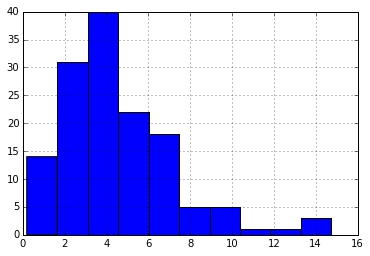

In [17]:
df.Jan.hist();

#### Part II
*just for fun..
the random variables are continuos variables, because of this i choose normal distribution, which has positive skewness. 

..but the exercise says choose two, then the less worse would be gamma.

In [47]:
# Normal distribution:

mean = df.mean() # mean = miu
var = df.var() 
sig = var**.5 # sig square = variance
print 'mean {}:'.format(mean)
print 'variance {}:'.format(var)
print 'sigma {}:'.format(sig)

mean Year    1940.842857
Jan        4.544571
Feb        4.106857
Mar        4.941500
Apr        4.210429
May        4.338929
Jun        3.879071
Jul        3.885214
Aug        3.336857
Sep        3.377286
Oct        2.610500
Nov        3.694857
Dec        4.190714
dtype: float64:
variance Year    1676.996711
Jan        6.916775
Feb        5.544702
Mar        5.219086
Apr        4.141670
May        5.319634
Jun        5.064968
Jul        3.789274
Aug        3.675412
Sep        4.975620
Oct        2.761383
Nov        3.694316
Dec        5.427253
dtype: float64:
sigma Year    40.951150
Jan      2.629976
Feb      2.354719
Mar      2.284532
Apr      2.035109
May      2.306433
Jun      2.250548
Jul      1.946606
Aug      1.917136
Sep      2.230610
Oct      1.661741
Nov      1.922060
Dec      2.329646
dtype: float64:


In [52]:
# Gamma distribution:

# miu = alpha / beta 
# sqrt(sigma) = alpha / sqrt(beta)

beta = mean / var 
alpha = mean * beta

print 'beta {}:'.format(beta)
print 'alpha {}:'.format(alpha)

beta Year    1.157333
Jan     0.657036
Feb     0.740681
Mar     0.946813
Apr     1.016602
May     0.815644
Jun     0.765863
Jul     1.025319
Aug     0.907887
Sep     0.678767
Oct     0.945360
Nov     1.000147
Dec     0.772161
dtype: float64:
alpha Year    2246.200586
Jan        2.985948
Feb        3.041872
Mar        4.678678
Apr        4.280328
May        3.539022
Jun        2.970837
Jul        3.983584
Aug        3.029488
Sep        2.292389
Oct        2.467861
Nov        3.695399
Dec        3.235907
dtype: float64:


In [ ]:
# Probability density function:

# Normal distribution :  norm(mean, stdev).pdf(np.linspace(x,y))
# Gamma distribution : gamma(alpha, )

In [50]:
normalfit=stats.norm(mean[1], sig[1]).pdf(np.linspace(0, 16))

In [53]:
gammafit=stats.gamma(mean[1], 1/beta[1]).pdf(np.linspace(0,15))

In [51]:
beta[1]

0.65703621533037204

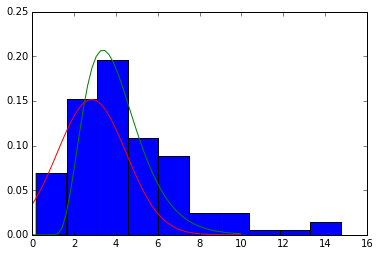

In [61]:
plt.hist(df.Jan, normed=1);
plt.plot(np.linspace(0,10), gammafit);
plt.plot(np.linspace(0,10), normalfit);

In [62]:
df[:2]

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1871,2.76,4.58,5.01,4.13,3.30,2.98,1.58,2.36,0.95,1.31,2.13,1.65
1,1872,2.32,2.11,3.14,5.91,3.09,5.17,6.10,1.65,4.50,1.58,2.25,2.38


#### Graph of every month

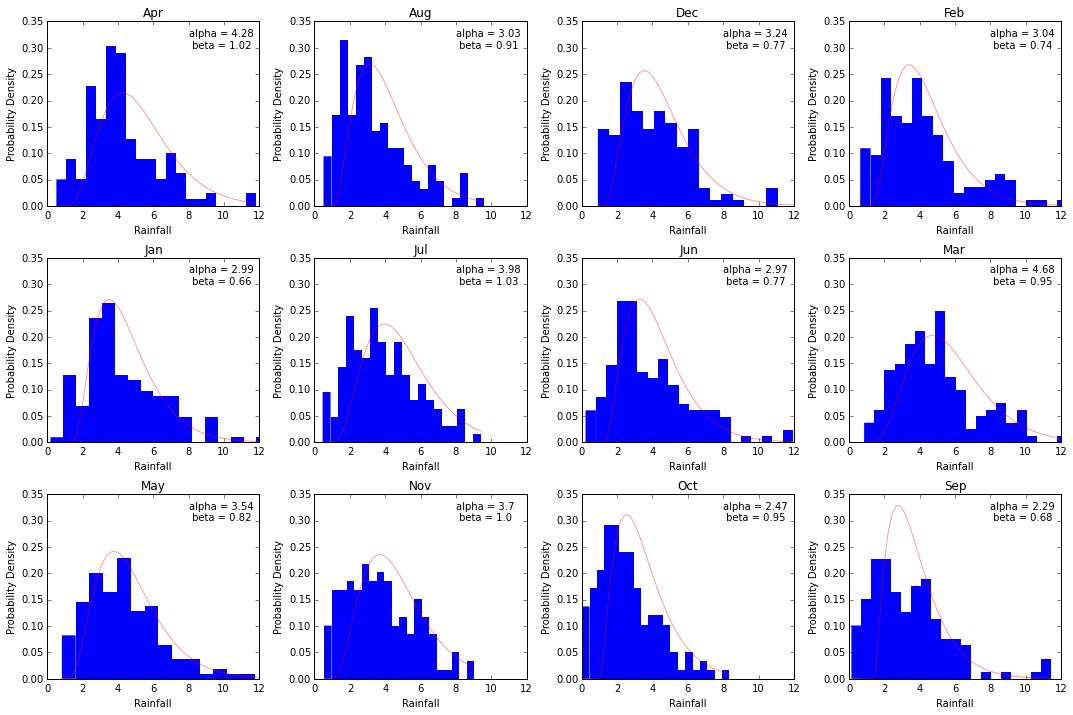

In [83]:
def method_of_moment(df, col, ax):
    
    
    data = df[col]
    
    sample_mean = data.mean()
    sample_var = data.var()
    
    alpha = sample_mean**2 / sample_var
    beta = sample_mean / sample_var
    
    gamma_rv = stats.gamma(alpha, 1/beta)
    x_vals = np.linspace(data.min(), data.max())
    gamma_p = gamma_rv.pdf(x_vals)
    
    ax.plot(x_vals, gamma_p, color='r', alpha=0.4)

    ax.set_xlabel('Rainfall')
    ax.set_ylabel('Probability Density')
    ax.set_title(col)

    ax.set_xlim(0, 12)
    ax.set_ylim(0., .35)
    ax.legend()
    label = 'alpha = {} \n beta = {}'.format(round(alpha, 2), round(beta,2))
    ax.annotate(label, xy=(8, .3))

months = df.columns - ['Year']
df_months = df[months]

#Pandas to get the histograms, axes are returned as tuplex

axes = df_months.hist(bins=20, normed=1, grid=0, 
                      edgecolor='none', figsize=(15,10), 
                      layout=(3, 4))

for month, ax in zip(months, axes.flatten()):
    method_of_moment(df_months, month, ax)
    
    
    
plt.tight_layout()  
    
    

In [70]:
df[months][:2]

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,4.13,2.36,1.65,4.58,2.76,1.58,2.98,5.01,3.30,2.13,1.31,0.95
1,5.91,1.65,2.38,2.11,2.32,6.10,5.17,3.14,3.09,2.25,1.58,4.50


In [72]:
sample_mean = df[months].mean()

In [73]:
sample_var = np.sum(np.square(df[months] - sample_mean)) /  (df[months].count() - 1)

In [74]:
sample_var

Apr    4.141670
Aug    3.675412
Dec    5.427253
Feb    5.544702
Jan    6.916775
Jul    3.789274
Jun    5.064968
Mar    5.219086
May    5.319634
Nov    3.694316
Oct    2.761383
Sep    4.975620
dtype: float64

In [75]:
sam_var = df[months].var()

In [76]:
sam_var

Apr    4.141670
Aug    3.675412
Dec    5.427253
Feb    5.544702
Jan    6.916775
Jul    3.789274
Jun    5.064968
Mar    5.219086
May    5.319634
Nov    3.694316
Oct    2.761383
Sep    4.975620
dtype: float64

#### Maximum likelihood estimation

#### Poisson distribution:
        mean = lambda
        variance = lambda

In [97]:
lambd = mean
lambd[1]

4.5445714285714303

Given data was drawn from a Poisson distribution, where , calculate the likelihood of observing a value of 6. Use .pmf().

In [88]:
stats.poisson.pmf(6, lambd[1])

0.12999983830382261

Create a likelihood() function that takes in a lambda and a discrete value, and returns the likelihood of observing that value given the particular lambda.

In [95]:
def likelihood(x, lbd):
    return lbd ** x / math.factorial(x) * math.exp(-lbd)
    

In [98]:
likelihood(6, lambd[1])

0.12999983830382278

Using numpy, read the file data/poisson.txt into a numpy array.



In [102]:
poisson_arr = np.genfromtxt('data/poisson.txt', delimiter=',')

In [104]:
poisson_arr[:10]

array([  4.,   2.,   6.,   3.,   6.,   5.,   4.,  11.,   5.,  11.])

For a continuous range of lambda ranging from 1 - 17 (use numpy.linspace()), get the likelihood of all the data points. Take the log (numpy.log()) of the likelihoods so we can sum the log likelihoods.

In [111]:
x_np = np.arange(1, 17)
x_np

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [112]:
loglikelihood = [ likelihood(i, lambd[1]) for i in x_np]

Plot the total likelihood (sum over all data points) for various values of lambda and determine the lambda which maximizes the likelihood. This is our MLE point estimate.

In [114]:
totallikelihood = np.sum([ likelihood(i, lambd[1]) for i in x_np])

In [115]:
totallikelihood

0.98936929640337978

___
CLT

In [132]:
def graph_creator(distribution, parameters, size):
    
    if distribution == 'binomial':
        n, p = parameters['n'], parameters['p']
        distri = stats.binom(n, p).rvs(size)
    
    elif distribution == 'bernoulli':
        p = parameters['p']
        distri =  stats.bernoulli(p).rvs(p, size)

    elif distribution == 'poisson':
        lambd = parameters['l']
        distri = stats.poisson(lambd).rvs(size)
    
    elif distribution == 'normal':
        m, s = parameters['m'], paremeters['s']
        distri= stats.norm(m, s).rvs(size)
        
    elif distribution == 'exponential':
        lambd = parameters['l']
        distri = stats.expon(lambd).rvs(size)
    
    elif distribution == 'gamma':
        a, b = parameters['a'], parameters['b']
        distri = stats.gamma(a, scale=b).rvs(size)
        
    else:
        distri = None
    
    return distri
        

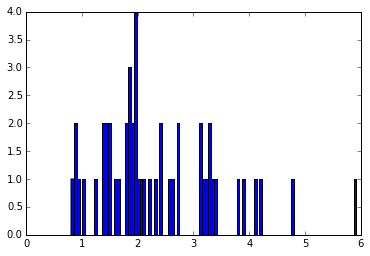

In [136]:
x_ = graph_creator('gamma',{'a': 5, 'b': 0.5}, 50)
_x = plt.hist(x_, bins = 100)